<a href="https://colab.research.google.com/github/SvetlanaShkryleva/image-processing/blob/main/Practice_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ДЗ 2
1. Зашумить изображение при помощи шума гаусса, постоянного шума.
2. Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
3. Выяснить, какой фильтр показал лучший результат фильтрации шума.

In [290]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [291]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

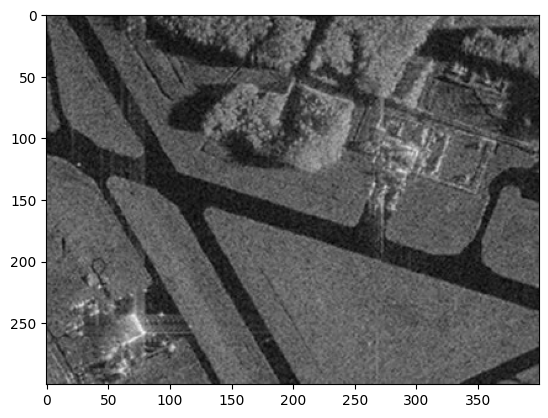

In [292]:
plt.imshow(image_gray, cmap="gray")

array([[  0,   0, 113, ...,   0, 191,  60],
       [200,  30,   0, ...,   0,   0, 186],
       [  0,  38,  19, ...,   0,  53, 185],
       ...,
       [  0, 113,  17, ...,  87,  60,   0],
       [ 10,   0,   0, ...,   0,   0,  42],
       [255,  21,  91, ...,   0,   0,   0]], dtype=uint8)
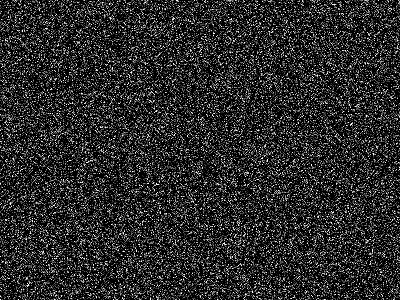

In [293]:
# Gaussian noise
mean = 0
stddev = 110
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

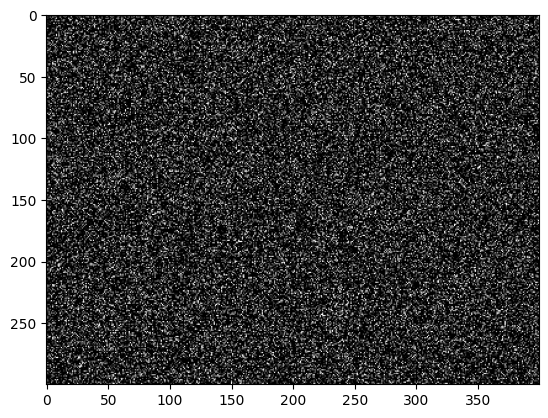

In [294]:
plt.imshow(noise_gauss, cmap="gray")

In [295]:
image_noise_gauss = image_gray + noise_gauss

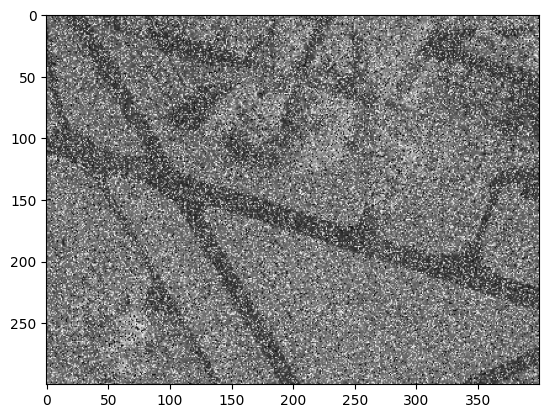

In [296]:
plt.imshow(image_noise_gauss, cmap="gray")

array([[  0,   0,  28, ...,  63, 105,  96],
       [ 48,   0,  46, ...,  79, 107,   0],
       [ 51,   0,  80, ...,  88,  41,   0],
       ...,
       [109,   0, 151, ...,  76,  86, 103],
       [ 45,  11, 149, ...,  88,  50,   0],
       [ 82,  75,  85, ...,  76,  91,   0]], dtype=uint8)
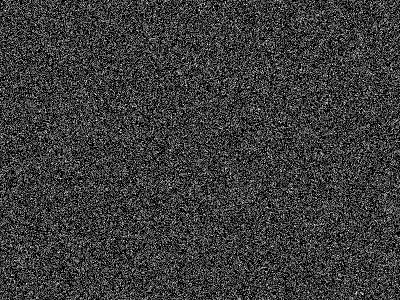

In [297]:
# Постоянный шум
a = 110
b = 0
mid = (a+b)/2

mean1 = mid
stdev1 = a-mid
noise_constant = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_constant, mean1, stdev1)

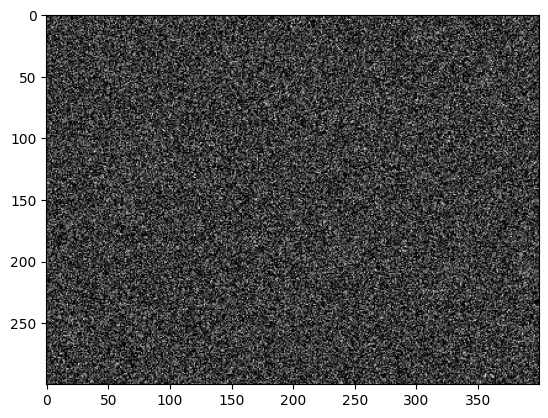

In [298]:
plt.imshow(noise_constant, cmap="gray")

In [299]:
image_noise_constant = image_gray + noise_constant

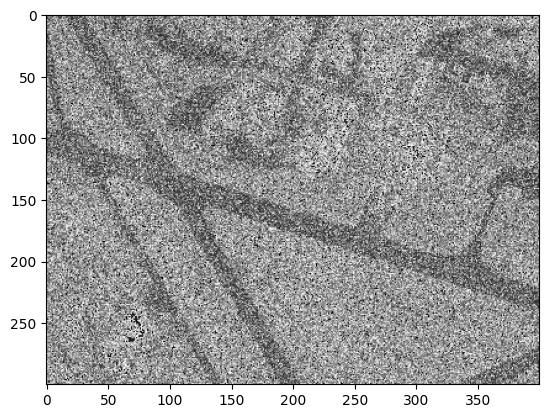

In [300]:
plt.imshow(image_noise_constant, cmap="gray")

In [301]:
# Шум соль-перец
noise_sp =  np.random.randint(0, 110, size = (image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise_sp == 0)
ones_pixel = np.where(noise_sp == 100)

In [302]:
bg_image = np.ones(image_gray.shape, np.uint8) * 128

In [303]:
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255

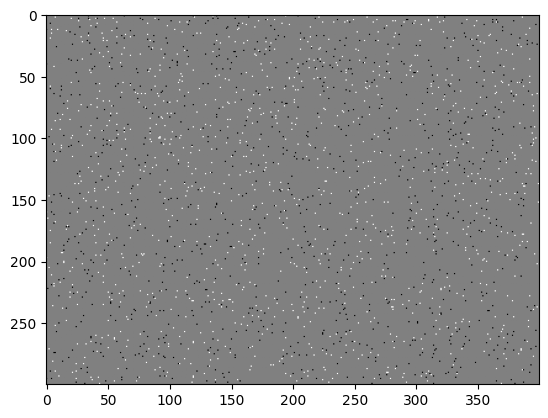

In [304]:
plt.imshow(bg_image, cmap="gray")

In [305]:
image_noise_sp = image_gray + noise_sp

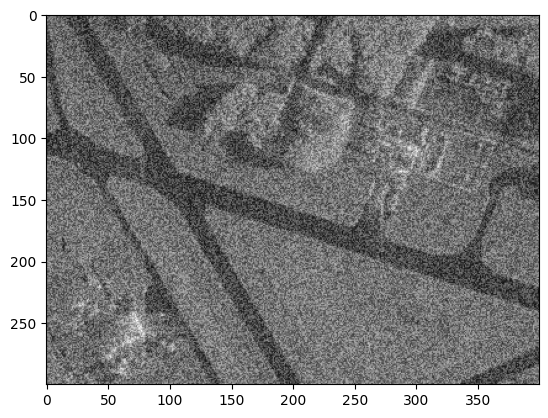

In [306]:
plt.imshow(image_noise_sp, cmap="gray")

In [307]:
# Медианный фильтр

In [308]:
from skimage.metrics import structural_similarity, mean_squared_error

In [309]:
# Сравнение: зашумлённое (шум Гаусса) и исходное изображение
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim_gauss, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim_gauss)

3167.6405583333335 0.10112335290597353


In [310]:
# Сравнение: зашумлённое (постоянный шум) и исходное изображение
mse_constant = mean_squared_error(image_gray, image_noise_constant)
(ssim_constant, diff) = structural_similarity(image_gray, image_noise_constant, full=True)
print(mse_constant, ssim_constant)

5105.391341666666 0.09161900063463058


In [311]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)

In [312]:
image_constant_median = cv2.medianBlur(image_noise_constant, 3)

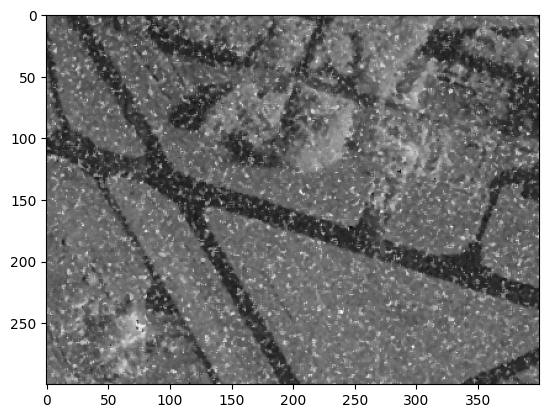

In [313]:
plt.imshow(image_gauss_median, cmap="gray")

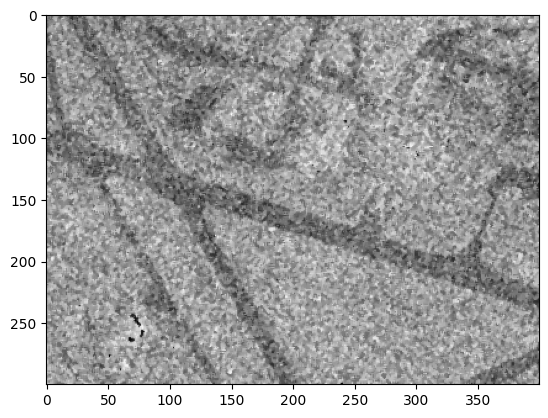

In [314]:
plt.imshow(image_constant_median, cmap="gray")

In [315]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, медианный фильтр) изображение
mse_gauss_median_cleared = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median_cleared, diff) = structural_similarity(image_gray, image_gauss_median, full=True)
print(mse_gauss_median_cleared, ssim_gauss_median_cleared)

517.79185 0.4394466912028973


In [316]:
# Сравнение: исходное и отфильтрованное (постоянный шум, медианный фильтр) изображение
mse_constant_median_cleared = mean_squared_error(image_gray, image_constant_median)
(ssim_constant_median_cleared, diff) = structural_similarity(image_gray, image_constant_median, full=True)
print(mse_constant_median_cleared, ssim_constant_median_cleared)

3058.0357833333333 0.26687239136390417


In [317]:
# Фильтр Гаусса

In [318]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)

In [319]:
image_constant_gauss = cv2.GaussianBlur(image_noise_constant,(5,5),0)

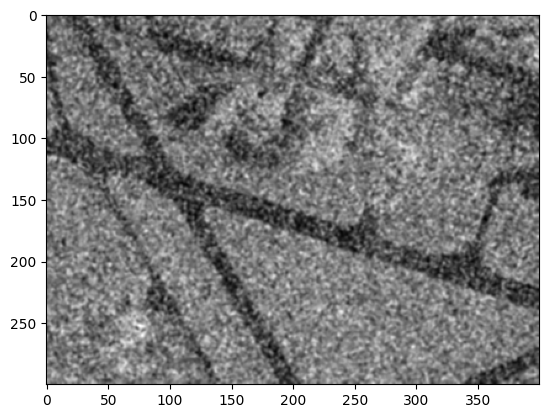

In [320]:
plt.imshow(image_gauss_gauss, cmap="gray")

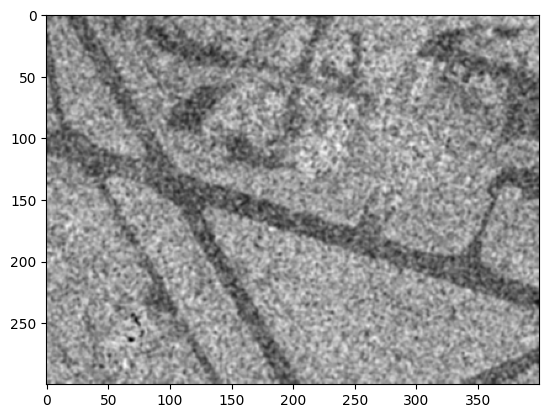

In [321]:
plt.imshow(image_constant_gauss, cmap="gray")

In [322]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_gauss_cleared = mean_squared_error(image_gray, image_gauss_gauss)
(ssim_gauss_gauss_cleared, diff) = structural_similarity(image_gray, image_gauss_gauss, full=True)
print(mse_gauss_gauss_cleared, ssim_gauss_gauss_cleared)

911.8942666666667 0.4121752142984641


In [323]:
# Сравнение: исходное и отфильтрованное (постоянный шум, фильтр Гаусса) изображение
mse_constant_gauss_cleared = mean_squared_error(image_gray, image_constant_gauss)
(ssim_constant_gauss_cleared, diff) = structural_similarity(image_gray, image_constant_gauss, full=True)
print(mse_constant_gauss_cleared, ssim_constant_gauss_cleared)

2858.0951666666665 0.3786725531971661


In [324]:
# Билатериальный фильтр (на примере гауссовского шума)

In [325]:
image_gauss_bilat_1 = cv2.bilateralFilter(image_noise_gauss,49,150,150)
image_gauss_bilat_2 = cv2.bilateralFilter(image_noise_gauss,25,150,150)
image_gauss_bilat_3 = cv2.bilateralFilter(image_noise_gauss,9,150,150)
image_gauss_bilat_4 = cv2.bilateralFilter(image_noise_gauss,9,75,75)

In [326]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_bilat_cleared_1 = mean_squared_error(image_gray, image_gauss_bilat_1)
(ssim_gauss_bilat_cleared_1, diff) = structural_similarity(image_gray, image_gauss_bilat_1, full=True)
print(mse_gauss_bilat_cleared_1, ssim_gauss_bilat_cleared_1)

921.564775 0.36226541879625357


In [327]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_bilat_cleared_2 = mean_squared_error(image_gray, image_gauss_bilat_2)
(ssim_gauss_bilat_cleared_2, diff) = structural_similarity(image_gray, image_gauss_bilat_2, full=True)
print(mse_gauss_bilat_cleared_2, ssim_gauss_bilat_cleared_2)

821.7035166666667 0.38652572601339885


In [328]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_bilat_cleared_3 = mean_squared_error(image_gray, image_gauss_bilat_3)
(ssim_gauss_bilat_cleared_3, diff) = structural_similarity(image_gray, image_gauss_bilat_3, full=True)
print(mse_gauss_bilat_cleared_3, ssim_gauss_bilat_cleared_3)

771.3267916666666 0.42927624202663855


In [329]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_bilat_cleared_4 = mean_squared_error(image_gray, image_gauss_bilat_4)
(ssim_gauss_bilat_cleared_4, diff) = structural_similarity(image_gray, image_gauss_bilat_4, full=True)
print(mse_gauss_bilat_cleared_4, ssim_gauss_bilat_cleared_4)

955.5402833333334 0.27621897630039777


In [330]:
# Фильтр нелокальных средних (на примере гауссовского шума)

In [331]:
image_gauss_nlm_1 = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)
image_gauss_nlm_2 = cv2.fastNlMeansDenoising(image_noise_gauss, h = 120)
image_gauss_nlm_3 = cv2.fastNlMeansDenoising(image_noise_gauss, h = 2)

In [332]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_nlm_cleared_1 = mean_squared_error(image_gray, image_gauss_nlm_1)
(ssim_gauss_nlm_cleared_1, diff) = structural_similarity(image_gray, image_gauss_nlm_1, full=True)
print(mse_gauss_nlm_cleared_1, ssim_gauss_nlm_cleared_1)

3149.733008333333 0.10170831830362502


In [333]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_nlm_cleared_2 = mean_squared_error(image_gray, image_gauss_nlm_2)
(ssim_gauss_nlm_cleared_2, diff) = structural_similarity(image_gray, image_gauss_nlm_2, full=True)
print(mse_gauss_nlm_cleared_2, ssim_gauss_nlm_cleared_2)

902.1215666666667 0.38221453518527354


In [334]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_nlm_cleared_3 = mean_squared_error(image_gray, image_gauss_nlm_3)
(ssim_gauss_nlm_cleared_3, diff) = structural_similarity(image_gray, image_gauss_nlm_3, full=True)
print(mse_gauss_nlm_cleared_3, ssim_gauss_nlm_cleared_3)

3167.6405583333335 0.10112335290597353


In [335]:
# Билатериальный фильтр для постоянного шума
image_constant_bilat_1 = cv2.bilateralFilter(image_noise_constant, 49, 150, 150)
image_constant_bilat_2 = cv2.bilateralFilter(image_noise_constant, 25, 150, 150)
image_constant_bilat_3 = cv2.bilateralFilter(image_noise_constant, 9, 150, 150)
image_constant_bilat_4 = cv2.bilateralFilter(image_noise_constant, 9, 75, 75)

In [336]:
# Сравнение разных параметров билатериального фильтра для постоянного шума
mse_constant_bilat_cleared_1 = mean_squared_error(image_gray, image_constant_bilat_1)
(ssim_constant_bilat_cleared_1, diff) = structural_similarity(image_gray, image_constant_bilat_1, full=True)
print(f"Билатериальный (49,150,150) - MSE: {mse_constant_bilat_cleared_1:.2f}, SSIM: {ssim_constant_bilat_cleared_1:.4f}")

mse_constant_bilat_cleared_2 = mean_squared_error(image_gray, image_constant_bilat_2)
(ssim_constant_bilat_cleared_2, diff) = structural_similarity(image_gray, image_constant_bilat_2, full=True)
print(f"Билатериальный (25,150,150) - MSE: {mse_constant_bilat_cleared_2:.2f}, SSIM: {ssim_constant_bilat_cleared_2:.4f}")

mse_constant_bilat_cleared_3 = mean_squared_error(image_gray, image_constant_bilat_3)
(ssim_constant_bilat_cleared_3, diff) = structural_similarity(image_gray, image_constant_bilat_3, full=True)
print(f"Билатериальный (9,150,150) - MSE: {mse_constant_bilat_cleared_3:.2f}, SSIM: {ssim_constant_bilat_cleared_3:.4f}")

mse_constant_bilat_cleared_4 = mean_squared_error(image_gray, image_constant_bilat_4)
(ssim_constant_bilat_cleared_4, diff) = structural_similarity(image_gray, image_constant_bilat_4, full=True)
print(f"Билатериальный (9,75,75) - MSE: {mse_constant_bilat_cleared_4:.2f}, SSIM: {ssim_constant_bilat_cleared_4:.4f}")

Билатериальный (49,150,150) - MSE: 2958.31, SSIM: 0.3369
Билатериальный (25,150,150) - MSE: 2863.82, SSIM: 0.3589
Билатериальный (9,150,150) - MSE: 2822.10, SSIM: 0.3929
Билатериальный (9,75,75) - MSE: 3047.92, SSIM: 0.2665


In [337]:
# Фильтр нелокальных средних для постоянного шума
image_constant_nlm_1 = cv2.fastNlMeansDenoising(image_noise_constant, h=20)
image_constant_nlm_2 = cv2.fastNlMeansDenoising(image_noise_constant, h=120)
image_constant_nlm_3 = cv2.fastNlMeansDenoising(image_noise_constant, h=2)

In [338]:
# Сравнение разных параметров NLM для постоянного шума
mse_constant_nlm_cleared_1 = mean_squared_error(image_gray, image_constant_nlm_1)
(ssim_constant_nlm_cleared_1, diff) = structural_similarity(image_gray, image_constant_nlm_1, full=True)
print(f"NLM (h=20) - MSE: {mse_constant_nlm_cleared_1:.2f}, SSIM: {ssim_constant_nlm_cleared_1:.4f}")

mse_constant_nlm_cleared_2 = mean_squared_error(image_gray, image_constant_nlm_2)
(ssim_constant_nlm_cleared_2, diff) = structural_similarity(image_gray, image_constant_nlm_2, full=True)
print(f"NLM (h=120) - MSE: {mse_constant_nlm_cleared_2:.2f}, SSIM: {ssim_constant_nlm_cleared_2:.4f}")

mse_constant_nlm_cleared_3 = mean_squared_error(image_gray, image_constant_nlm_3)
(ssim_constant_nlm_cleared_3, diff) = structural_similarity(image_gray, image_constant_nlm_3, full=True)
print(f"NLM (h=2) - MSE: {mse_constant_nlm_cleared_3:.2f}, SSIM: {ssim_constant_nlm_cleared_3:.4f}")

NLM (h=20) - MSE: 5097.08, SSIM: 0.0918
NLM (h=120) - MSE: 2835.79, SSIM: 0.3543
NLM (h=2) - MSE: 5105.39, SSIM: 0.0916


In [339]:
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

In [340]:
print("АНАЛИЗ РЕЗУЛЬТАТОВ ФИЛЬТРАЦИИ ШУМА")

print("\n--- ДЛЯ ГАУССОВСКОГО ШУМА ---")
print("Метрики качества (MSE - чем меньше, тем лучше; SSIM - чем ближе к 1, тем лучше):")
print(f"Медианный фильтр (3x3):     MSE = {mse_gauss_median_cleared:.1f}, SSIM = {ssim_gauss_median_cleared:.4f}")
print(f"Фильтр Гаусса (5x5):        MSE = {mse_gauss_gauss_cleared:.1f}, SSIM = {ssim_gauss_gauss_cleared:.4f}")
print(f"Билатериальный (9,150,150): MSE = {mse_gauss_bilat_cleared_3:.1f}, SSIM = {ssim_gauss_bilat_cleared_3:.4f}")
print(f"NLM (h=120):                MSE = {mse_gauss_nlm_cleared_2:.1f}, SSIM = {ssim_gauss_nlm_cleared_2:.4f}")

filters_gauss = {
    "Медианный фильтр": (mse_gauss_median_cleared, ssim_gauss_median_cleared),
    "Фильтр Гаусса": (mse_gauss_gauss_cleared, ssim_gauss_gauss_cleared),
    "Билатериальный фильтр": (mse_gauss_bilat_cleared_3, ssim_gauss_bilat_cleared_3),
    "NLM фильтр": (mse_gauss_nlm_cleared_2, ssim_gauss_nlm_cleared_2)
}

best_mse_gauss = min(filters_gauss.items(), key=lambda x: x[1][0])
best_ssim_gauss = max(filters_gauss.items(), key=lambda x: x[1][1])

print(f"   - Лучший по MSE: {best_mse_gauss[0]} (MSE = {best_mse_gauss[1][0]:.1f})")
print(f"   - Лучший по SSIM: {best_ssim_gauss[0]} (SSIM = {best_ssim_gauss[1][1]:.4f})")

print("\n--- ДЛЯ ПОСТОЯННОГО ШУМА ---")
print(f"Медианный фильтр (3x3):     MSE = {mse_constant_median_cleared:.1f}, SSIM = {ssim_constant_median_cleared:.4f}")
print(f"Фильтр Гаусса (5x5):        MSE = {mse_constant_gauss_cleared:.1f}, SSIM = {ssim_constant_gauss_cleared:.4f}")
print(f"Билатериальный (9,150,150): MSE = {mse_constant_bilat_cleared_3:.1f}, SSIM = {ssim_constant_bilat_cleared_3:.4f}")
print(f"NLM (h=120):                MSE = {mse_constant_nlm_cleared_2:.1f}, SSIM = {ssim_constant_nlm_cleared_2:.4f}")

filters_constant = {
    "Медианный фильтр": (mse_constant_median_cleared, ssim_constant_median_cleared),
    "Фильтр Гаусса": (mse_constant_gauss_cleared, ssim_constant_gauss_cleared),
    "Билатериальный фильтр": (mse_constant_bilat_cleared_3, ssim_constant_bilat_cleared_3),
    "NLM фильтр": (mse_constant_nlm_cleared_2, ssim_constant_nlm_cleared_2)
}

best_mse_constant = min(filters_constant.items(), key=lambda x: x[1][0])
best_ssim_constant = max(filters_constant.items(), key=lambda x: x[1][1])

print(f"   - Лучший по MSE: {best_mse_constant[0]} (MSE = {best_mse_constant[1][0]:.1f})")
print(f"   - Лучший по SSIM: {best_ssim_constant[0]} (SSIM = {best_ssim_constant[1][1]:.4f})")

АНАЛИЗ РЕЗУЛЬТАТОВ ФИЛЬТРАЦИИ ШУМА

--- ДЛЯ ГАУССОВСКОГО ШУМА ---
Метрики качества (MSE - чем меньше, тем лучше; SSIM - чем ближе к 1, тем лучше):
Медианный фильтр (3x3):     MSE = 517.8, SSIM = 0.4394
Фильтр Гаусса (5x5):        MSE = 911.9, SSIM = 0.4122
Билатериальный (9,150,150): MSE = 771.3, SSIM = 0.4293
NLM (h=120):                MSE = 902.1, SSIM = 0.3822
   - Лучший по MSE: Медианный фильтр (MSE = 517.8)
   - Лучший по SSIM: Медианный фильтр (SSIM = 0.4394)

--- ДЛЯ ПОСТОЯННОГО ШУМА ---
Медианный фильтр (3x3):     MSE = 3058.0, SSIM = 0.2669
Фильтр Гаусса (5x5):        MSE = 2858.1, SSIM = 0.3787
Билатериальный (9,150,150): MSE = 2822.1, SSIM = 0.3929
NLM (h=120):                MSE = 2835.8, SSIM = 0.3543
   - Лучший по MSE: Билатериальный фильтр (MSE = 2822.1)
   - Лучший по SSIM: Билатериальный фильтр (SSIM = 0.3929)
